In [74]:
#import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from kneed import KneeLocator

In [75]:
# Load dataset
df = pd.read_csv('C:/Users/Thanusree/Documents/Projects/job_recommendation.csv')

In [76]:
df.head()

,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Functional Area,Industry
0,Media Planning Executive/Manager,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,"Marketing , Advertising , MR , PR , Media Planning","Advertising, PR, MR, Event Management"
1,Sales Executive/Officer,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| clients| requirements| negotiating| client| online bidding| good communication| technology,Retail Sales,"Sales , Retail , Business Development","IT-Software, Software Services"
2,R&D Executive,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check| Intellectual property| Electronics| Support services| Research| Management| Human resource management| Research Executive,R&D,"Engineering Design , R&D","Recruitment, Staffing"
3,Technical Support Engineer,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,"IT Software - Application Programming , Maintenance","IT-Software, Software Services"
4,Testing Engineer,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases| web testing| web technologies,Programming & Design,IT Software - QA & Testing,"IT-Software, Software Services"


In [77]:
df.tail()

,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Functional Area,Industry
994,Assistant Professor,Not Disclosed by Recruiter,2 - 5 yrs,Counselor| Mentor| Trainer| Advisor| Teaching,University Level,"Teaching , Education , Training , Counselling","Education, Teaching, Training"
995,Associate/Senior Associate -(NonTechnical),"50,000 - 3,00,000 PA.",0 - 5 yrs,international bpo| customer care| domestic| outbound process| sales process| Domestic BPO| bpo fresher| bpo executive,Voice,"ITES , BPO , KPO , LPO , Customer Service , Operations","BPO, Call Centre, ITeS"
996,System Administrator,Not Disclosed by Recruiter,6 - 8 yrs,network automation| Customer management| Customer satisfaction| Trend analysis| Effort estimation| Management| Software services,Admin/Maintenance/Security/Datawarehousing,"IT Software - Application Programming , Maintenance","Recruitment, Staffing"
997,Assistant Manager/Manager-(NonTechnical),Not Disclosed by Recruiter,6 - 7 yrs,Copy Editor| Language Expert| Quality check,Back Office/Web/Transaction Processing,"ITES , BPO , KPO , LPO , Customer Service , Operations","IT-Software, Software Services"
998,System Administrator,Not Disclosed by Recruiter,5 - 8 Years,Hive|Linux|Hadoop|Cloud|Hdfs|Spark|Clustering|YARN|AWS|Devops,Admin/Maintenance/Security/Datawarehousing,"IT Software - DBA , Datawarehousing",IT-Software / Software Services


In [78]:
# Checking missing values
df.isna().sum()

Job Title                  0
Job Salary                 0
Job Experience Required    0
Key Skills                 0
Role Category              0
Functional Area            0
Industry                   0
dtype: int64

In [79]:
# Feature extraction
vectorizer=TfidfVectorizer(stop_words='english',lowercase=True)
df_final=vectorizer.fit_transform(df['Key Skills'])

In [80]:
# Optimal number of clusters using elbow method
wcss=[]
K_range=range(2, 10)  

for k in K_range:
    kmeans=KMeans(n_clusters=k, random_state=42,init='k-means++')
    kmeans.fit(df_final)
    wcss.append(kmeans.inertia_)  

In [81]:
knee=KneeLocator(K_range,wcss,curve='convex',direction='decreasing')
num_clusters=knee.knee

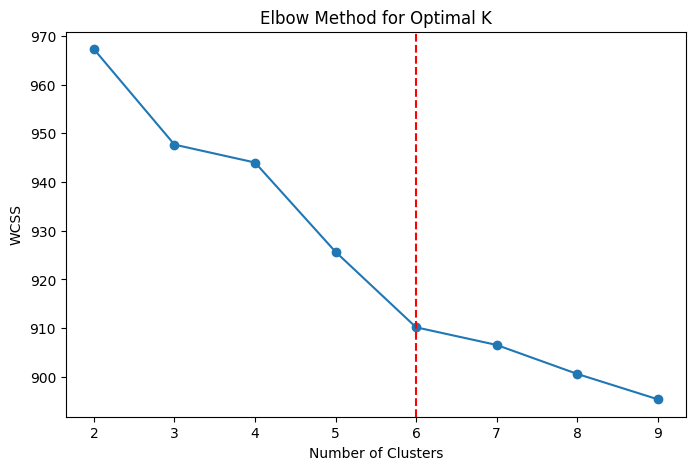

In [82]:
plt.figure(figsize=(8, 5))
plt.plot(K_range,wcss,marker='o')
plt.axvline(x=num_clusters,color='red',linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

In [83]:
# Clustering using K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42,init='k-means++')
df['Cluster']=kmeans.fit_predict(df_final)

In [84]:
# Job Recommendation
def recommend_jobs(user_input,top_n=5,similarity_threshold=0.1):

    if not user_input.strip():
        return "Please provide valid input skills."
    
    user_tfidf=vectorizer.transform([user_input])
    user_cluster=kmeans.predict(user_tfidf)[0]  
    
    
    cluster_jobs=df[df['Cluster'] == user_cluster].copy()
    
    similarities = cosine_similarity(user_tfidf, df_final[cluster_jobs.index]).flatten()

    cluster_jobs['Similarity']=similarities

    cluster_jobs=cluster_jobs[cluster_jobs['Similarity'] >= similarity_threshold]
    
    if cluster_jobs.empty:
        return "No relevant jobs found. Please refine your input."
    
    cluster_jobs = cluster_jobs.sort_values(by='Similarity', ascending=False)
    
    return cluster_jobs[['Job Title', 'Key Skills','Job Experience Required','Job Salary','Industry']].reset_index(drop=True).head(top_n)


In [97]:
pd.set_option('display.max_colwidth', None) 

print(recommend_jobs('Looking for a job in android'))


            Job Title  \
0  Software Developer   
1  Software Developer   
2  Software Developer   
3    Testing Engineer   
4  Software Developer   

                                                                                                                                                      Key Skills  \
0                                                                                                              financial s| windows| android| mobile development   
1                                                                                PHP| Android| SEO| Facebook| Pharma| Email| Architecture| mbbs| Linkedin| Usage   
2  Design Development|Software Engineering|Lighting|Computer Science|Product Quality|Automation Testing|Asset Management|GUI|Object Oriented Programming|Android   
3                      Manual testing| Eclipse| Coding| Scrum| Enterprise applications| Healthcare| JIRA| Android SDK| test driven development| Business Analyst   
4                            